In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [59]:
cd ~/Documents/Github/GSTEM/data/sampledata

/Users/catherinezhou/Documents/GitHub/GSTEM/data/sampledata


In [60]:
data = pd.read_csv("train.csv")

In [11]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


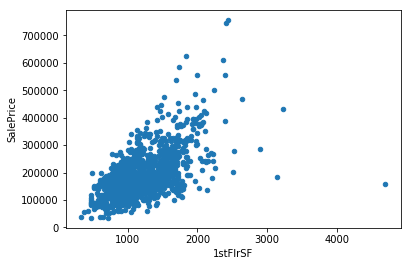

In [13]:
%matplotlib inline
data.plot(x = "1stFlrSF", y = "SalePrice", kind = 'scatter')

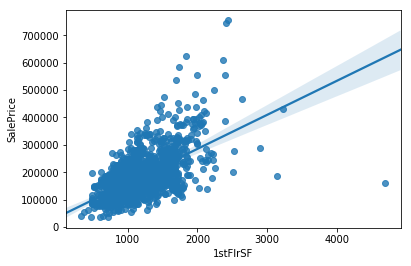

In [28]:
import seaborn as sns
sns.regplot("1stFlrSF","SalePrice", data)

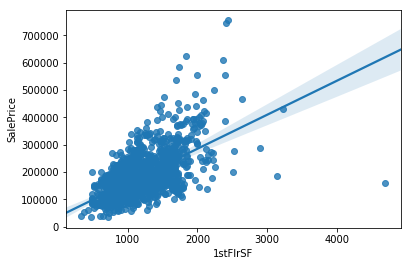

In [29]:
sns.regplot(data["1stFlrSF"], data["SalePrice"])

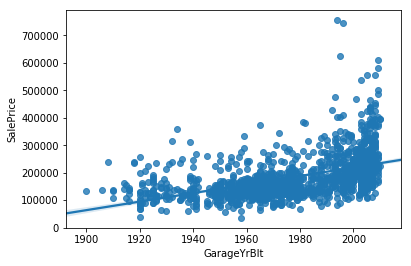

In [31]:
sns.regplot(data["GarageYrBlt"], data["SalePrice"])
# Not a good predictor 

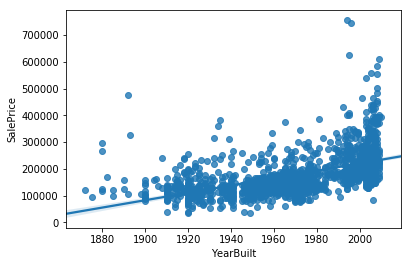

In [34]:
sns.regplot(data["YearBuilt"], data["SalePrice"])

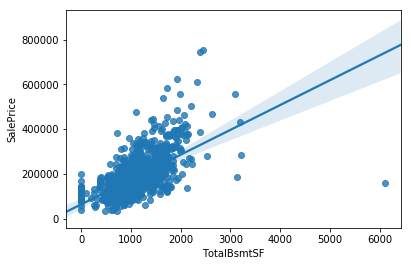

In [35]:
sns.regplot(data["TotalBsmtSF"], data["SalePrice"])

Coefficients: 
 [[1282.51783795]]
Root Mean squared error (RMSE): 72772.10


Text(0,0.5,'Selling Price')

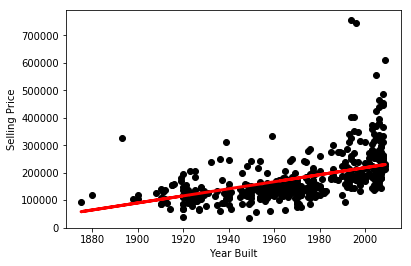

In [6]:
# Set x and y axes 
x = data[["YearBuilt"]]
y = data[['SalePrice']]

# Split the data 
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
# 0.33 = 33% saved for testing set 
# 0.67 = 67% saved for training + validation 

# Fitting model for training set
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_) 

# Why is RMSE calculated before the validation set is plotted? 
#It works when it's calculated after too. 

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

# Apply same model to validation set and set trend line  
ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Year Built")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[43696.47641718]]
Root Mean squared error (RMSE): 51746.72


Text(0,0.5,'Selling Price')

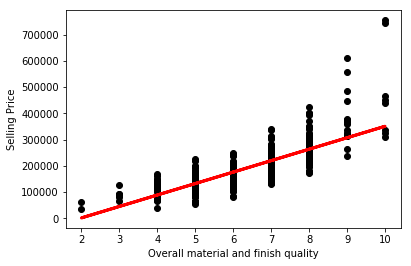

In [7]:
x = data[["OverallQual"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))


ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall material and finish quality")
ax.set_ylabel("Selling Price")


Coefficients: 
 [[98.50395317]]
Root Mean squared error (RMSE): 56577.61


Text(0,0.5,'Selling Price')

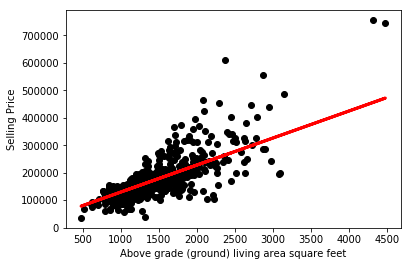

In [8]:
x = data[["GrLivArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Above grade (ground) living area square feet")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[226.93274858]]
Root Mean squared error (RMSE): 67299.54


Text(0,0.5,'Selling Price')

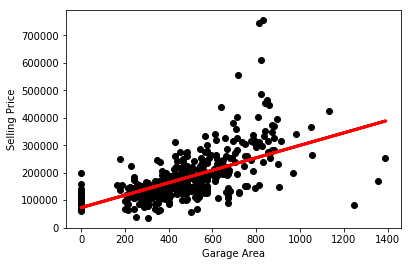

In [9]:
x = data[["GarageArea"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Garage Area")
ax.set_ylabel("Selling Price")

Coefficients: 
 [[53772.7636519]]
Root Mean squared error (RMSE): 75357.51


Text(0,0.5,'Selling Price')

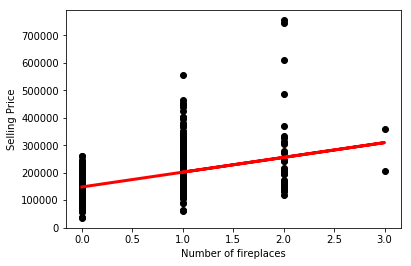

In [10]:
x = data[["Fireplaces"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Number of fireplaces")
ax.set_ylabel("Selling Price")

# Surprisingly more relevant to sale price than overall condition rating (next cell)

Coefficients: 
 [[-4710.19001992]]
Root Mean squared error (RMSE): 85347.52


Text(0,0.5,'Selling Price')

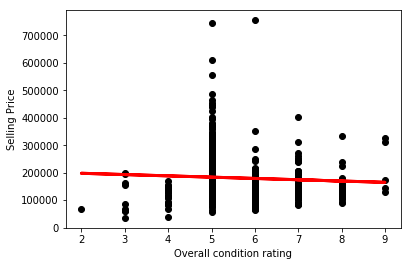

In [11]:
x = data[["OverallCond"]]
y = data[['SalePrice']]

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))
#print("Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_validation,regr.predict(x_validation))))
#print('R^2: %.2f' % regr.score(x_train, y_train))

ax = plt.subplot(111)
plt.scatter(x_validation, y_validation, color = 'black')
plt.plot(x_validation, regr.predict(x_validation), color = 'red', linewidth = 3)
ax.set_xlabel("Overall condition rating")
ax.set_ylabel("Selling Price")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20a9cc50>]],
      dtype=object)

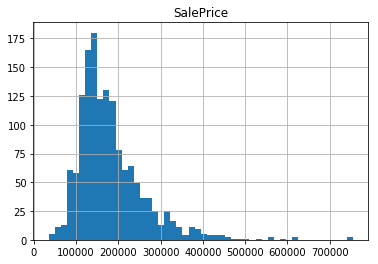

In [14]:
data.hist("SalePrice", bins = 50)

In [39]:
numericlist = data.select_dtypes(include='number')
numericlist

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [66]:
data = pd.read_csv("train.csv", index_col = 0)

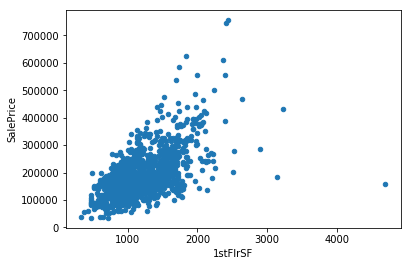

In [67]:
%matplotlib inline
data.plot(x = "1stFlrSF", y = "SalePrice", kind = 'scatter')

In [68]:
import seaborn as sns

def reg_plots(df, target):
    columns = data.select_dtypes(include=['number']).drop(target, axis= 1).columns
    col_num = len(columns)//3
    fig, axarr = plt.subplots( col_num,3, figsize=(18, 50))
    axarr = axarr.flatten()
    for i in range(len(columns)):
        sns.regplot(df[columns[i]], df[target], ax=axarr[i])

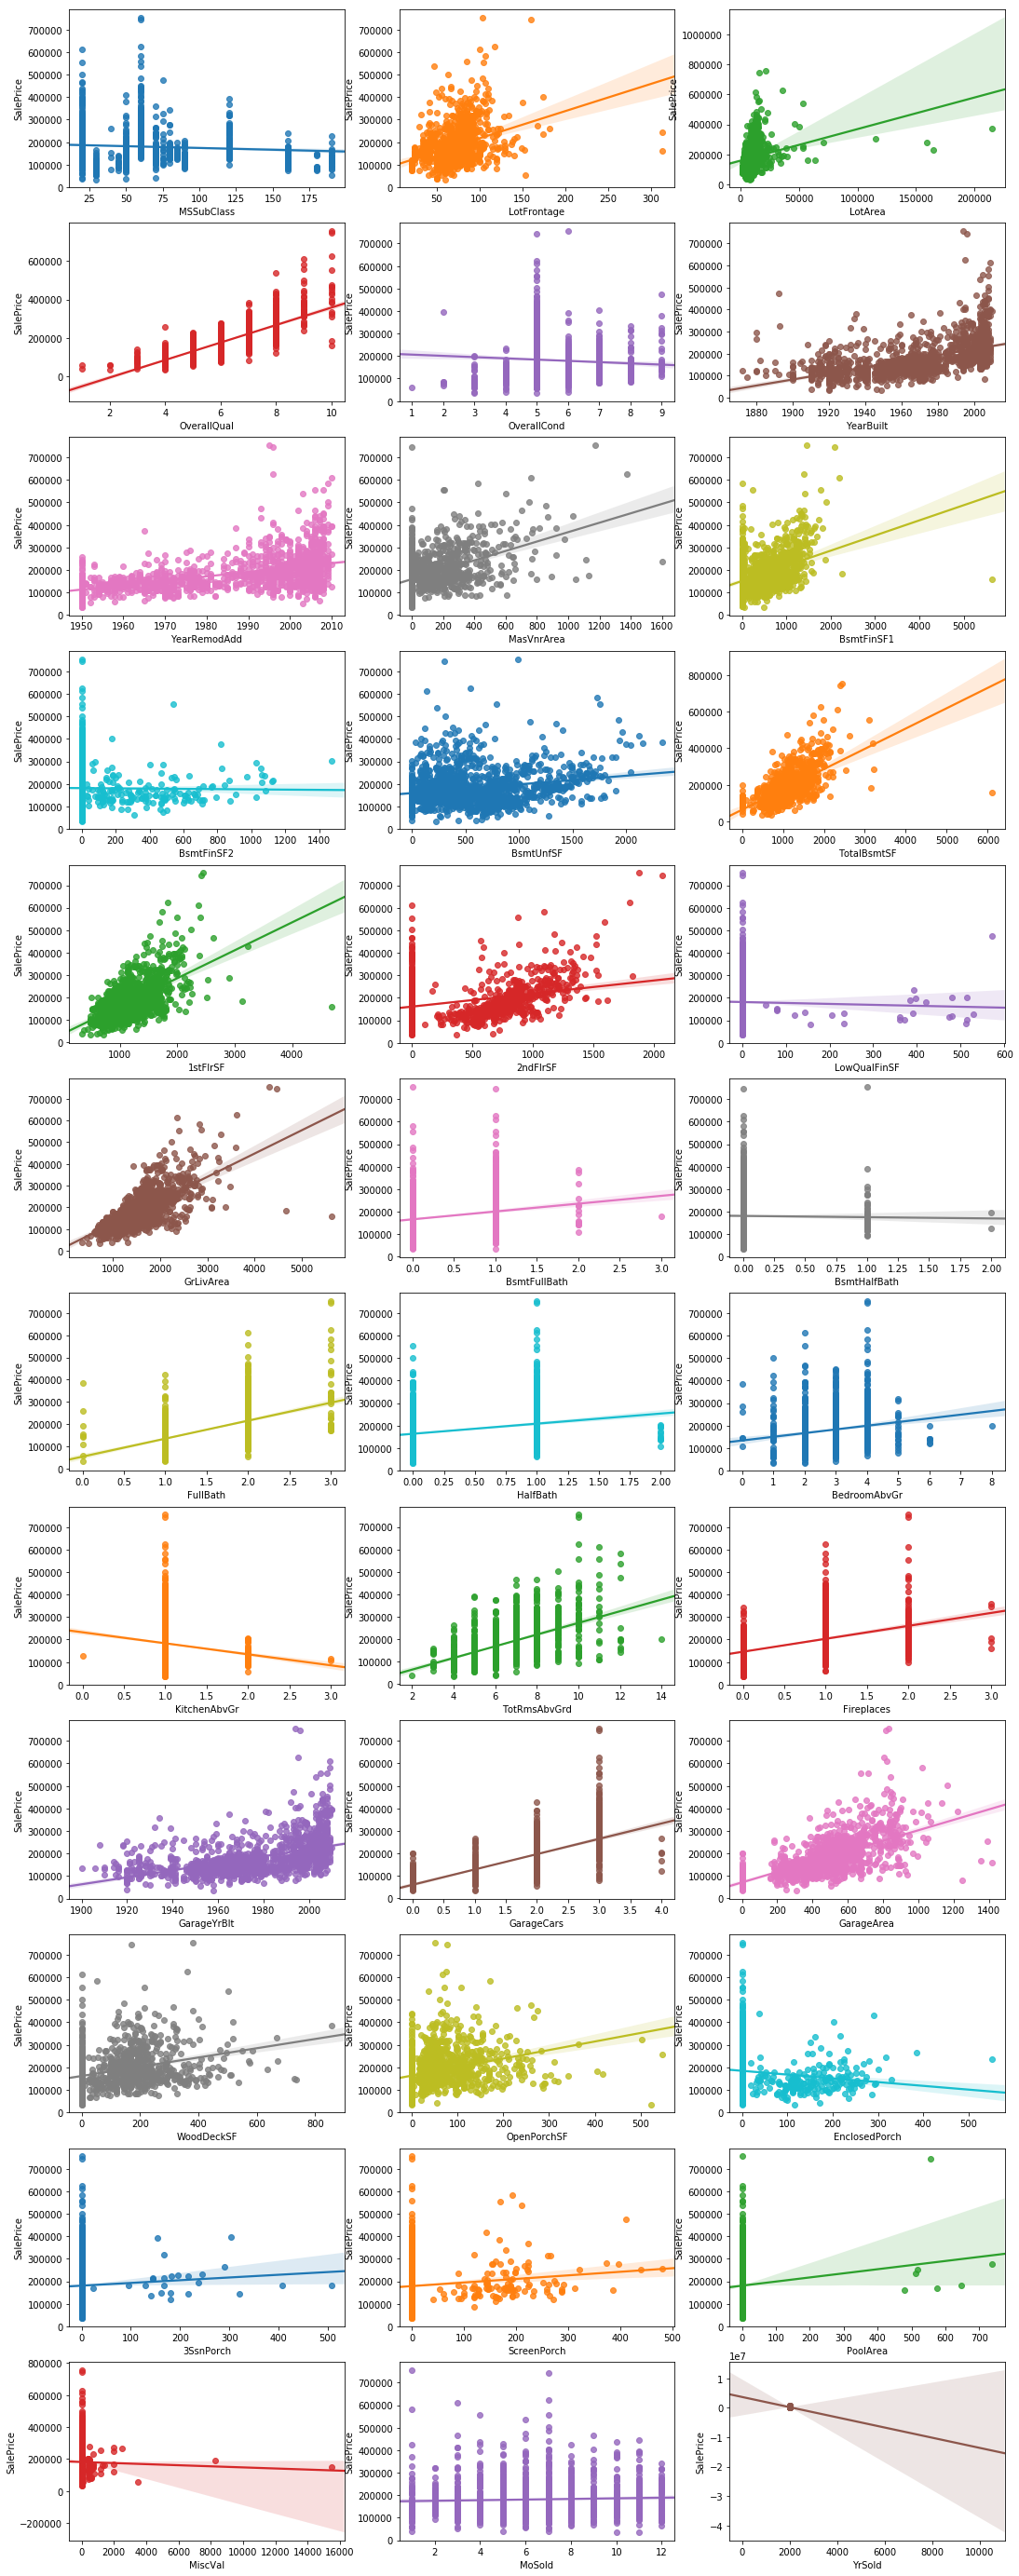

In [69]:
reg_plots(data, 'SalePrice')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20713dd8>]],
      dtype=object)

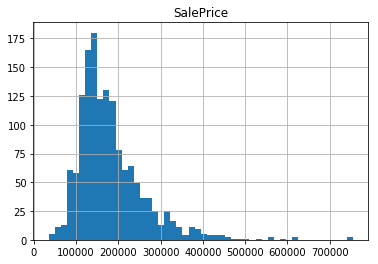

In [81]:
data.hist("SalePrice", bins = 50)

In [85]:
def linear_regression(df, target):
    columns = df.select_dtypes(include=['number']).drop(target, axis= 1).columns
    target = data[target]
    for i in range(len(columns)):
        x_train, x_validation, y_train, y_validation = train_test_split(df[columns[i]], target, test_size = 0.33, random_state = 42)
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        print("Root Mean squared error (RMSE): %.2f" % np.sqrt(np.mean((regr.predict(x_validation) - y_validation) ** 2)))

In [86]:
linear_regression(data, 'SalePrice')

ValueError: Expected 2D array, got 1D array instead:
array=[ 85  20  20  20  20  30  70  60 120  20  20  20  80  60  60  50  30  20
  20  20  20  20  20  20  20  70  20  20  20  50  90  20  70  50  60  20
  60  70  90 160  60  30  60  60  70  80 120 120  60  20  60  75  60  20
  20  20  20  80  90  80  60  60  20 120  20  60  60  20  20  30  60  45
  20  85 190  70  80  20 160  20  90  70  60  70  60  50  20  20  20  90
  20  50  20  60  60  70  60  20  20  20  50  85  70  50  80  50  60  20
  20  20  60  50  70 160  20  20  20  60  20  20  50  90  20  50  60  60
  20  20  60  20  70  30 120  60  30  60  20  20  30  85  20  60  20  20
  20  60  60  20  20  20  20  20 120  20  20  60  70  60  20  20  60  20
  30  60  20  30  20  80  20  20  60  80  60 120  90  60  45  20  20  60
  20 160 120  90  70  20  20  20  30  60  20  20  60  60  70  60 120  20
  20  50  85 160  50  60  90  50  50  75  20  20  50  90  60  60 160  60
  60  20  20 190  60  50  20 120  60  20  20  20  20  90 180 160  20  20
  20  20  80 160  20 160  30  75  20  20  20  20  50  60  60  20  60  70
  20  60  50  20  70  50  20  20  20  50  80  60  20  20  50  70  60  20
  50  20  20  20  20  60  40  60  20  50  20 160  60  20 120  20  60  20
  20 160  50  20  60  70  30  85 190  50  60  60 120  60  50  70  50  60
  20  60  50  20  90  60  20  60  70  80  20  50  70  20  20  50  80  20
  20  60  60  20  50 120  85 190  70  20  20  60  60 190 120  70  60  50
  20  60  20 160  50  20  70  60  60  20  20  60  20  60  50  20  50  60
  60  70  80  45  20  20  20  50  60  20  20  20 160  50  20  50  60  85
  60  80  20  80  60 190  80  20  60 160  30 190  20  80  60 190  20  90
  70  60  20  50  60 120  50  60  60 190  20 120  60  20  20  50  60  60
  30  20  20  20  40  20  80 160  20  30  30  20  60  60  20  60 120  70
  30  50  20 160  85  50  70  80  60  60  60  20  20  50  60  60  75  20
  60  50  20  50  20  20  20 120  20  50  20 160  30  30  20  90  20  90
 120  20  45  20  20  60  90  30 180 160 160  60  20  80  60  20  80 160
  20 120  20  20  75  20  60  20  20  90  50  20  60  50  20  30  20  75
  50  20  50  20 120  85  20  20  90  60  20  70  60  30 160  20  20  90
  20  30  20  50  60  60 160  20 160  20  60  70  70  50 190  90  20  50
  20  50  20  60  60  20  60  20 120 120  75 160 120 120  60  60  50  20
 190  80 180  20  60  20  70  30  20  20  20  20  20  60  50  20  70  20
 160  90  60 190  20  30  20  20  20  20  60  20 190  80  20 120  30  20
  20  60 120  20  70  20  60  20 190  20  30 160  30  60  20  50  20  70
  20  20  60  90  50  50  70 160 120  20  20 160 160  75  50  20  50  80
  60  20  20  20  20 120 160  50  60 120  60  20  60  60  60  20  20  70
  60  20 160 190  20  20  75 180  30  60  80  20 160  90  50  90  45  60
  85 120  70  30  60  20  50  20 160  60  20  80  50  20  60  45  20  60
  20  50  50  50 120 120  20 160  20  20  20 160  20  45  20 120  20  50
  20  60  80  20 160  50 120  20  20  20  50  60  20 160 190  20  60  60
  90  60  60  20  30 120  20  30  30  20  20  20  60 190  20  20  20  50
  20  20 120  60  80  30 160  20  50 160  50  60  80  20 180 120  20  60
 120  20 190  20  20  30  30  90  50  20  70  80  70  60  70  20  60  60
  75  75  60  60  60 120  20  20  50  20 190  60  60  30  60 120  20 120
  60  20  60  20 190  20  90  20  90  50  20  85  60  30  20  60  60  20
  20 120  80  20  75  80  60  20  60  20  70  20  50  80  20 190  30  60
  50  20  60  20  60  20  60  20  50 120  20  20  60 160  20  20  60  20
  60  60  20  20  50  80  60  20  20  20  30  20  50  20  60 120  60  90
  20  20  20  20 120  20  20  20  50  60  20  20 160  20  20 190  60  20
  60  20  60  60  50  60  20  80  50  85  20  20  80  20  90  20  70  20
  20  50  20  60  30  20  60  90  70  20  20 160  20 120 120  70 120  20
  20  60  90  60  20  20  30  20  60  60  80 180  20  70  60  20  60 160
  20  30 120  60  20 120 160 120  20  20 120  80  70  60  45  30  50  20
  20  90  20 120  20  20 120  60  20  60  60  20  20 160  90  20  20  50
  20  20  50  20  50 120].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.